# Decision Tree

- Gini(E) = 1-summation(j=1 to c (p^2)*j)
- Entropy(S) = - P(yes)\*log(P(yes)) - P(no)\*logP(no)
- Information Gain = Entropy(S) - [Weighted average*entropy(each feature)]

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [9]:
x = iris.data[:,2:] # petal length and width
y = iris.target

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [11]:
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
from sklearn.tree import export_graphviz
# from IPython.display import image
export_graphviz(tree_clf,out_file = 'iris_tree.dot',feature_names = iris.feature_names[2:],class_names=iris.target_names,
               rounded=True,filled=True)
# to output a graph definition file called iris_tree.dot
# iris_tree.dot -Tpng -o iris_tree.png ---> to convert the .dot file to .png file
## computer//properties/advanced setting/environment variables---> to set path

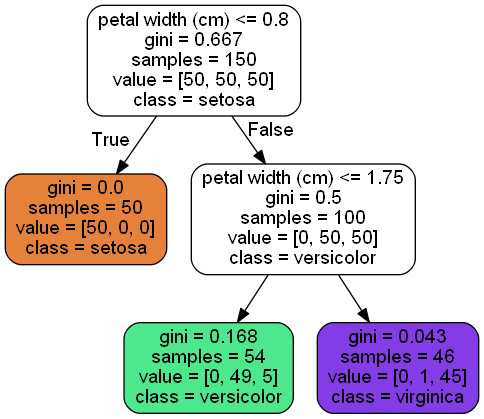

In [16]:
import os
os.environ['PATH']+=os.environ['PATH']+';'+r'C:\ProgramData\Anaconda3\Library\bin\graphviz\release\bin'
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf,out_file=dot_data,filled=True,rounded=True,feature_names=iris.feature_names[2:],
               class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
# rounded=False --> squares,filled=False --> Black and white

In [17]:
tree_clf.predict_proba([[5,1.9]])

array([[0.        , 0.02173913, 0.97826087]])

In [18]:
tree_clf.predict([[5,1.5]])

array([1])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((120, 2), (30, 2))

In [20]:
pred = tree_clf.predict(x_test)

In [21]:
print(metrics.accuracy_score(y_test,pred))

0.9666666666666667


In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [24]:
# from sklearn.tree import export_graphviz
# from IPython.display import image
## export_graphviz(reg_tree,out_file = 'iris_tree.dot',feature_names = iris.feature_names[2:],class_names=iris.target_names,
##               rounded=True,filled=True) ---> to save the .dot file in the directory

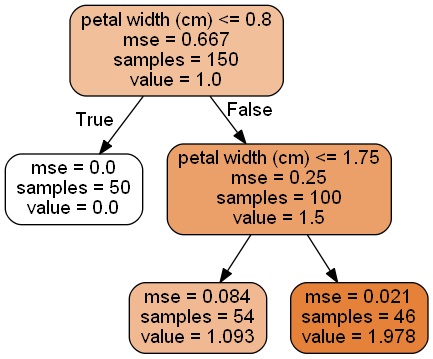

In [25]:
import os
os.environ['PATH']+=os.environ['PATH']+';'+r'C:\ProgramData\Anaconda3\Library\bin\graphviz\release\bin'
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(reg_tree,out_file=dot_data,filled=True,rounded=True,feature_names=iris.feature_names[2:],
               class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [26]:
reg_tree.predict([[5,1.9]])

array([1.97826087])